<a href="https://colab.research.google.com/github/mietekdom/Computer_Vision/blob/main/CV_phone_picture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import cv2
from google.colab.patches import cv2_imshow
import imutils

cv2.__version__

'4.1.2'

**Wczytywanie obrazu**

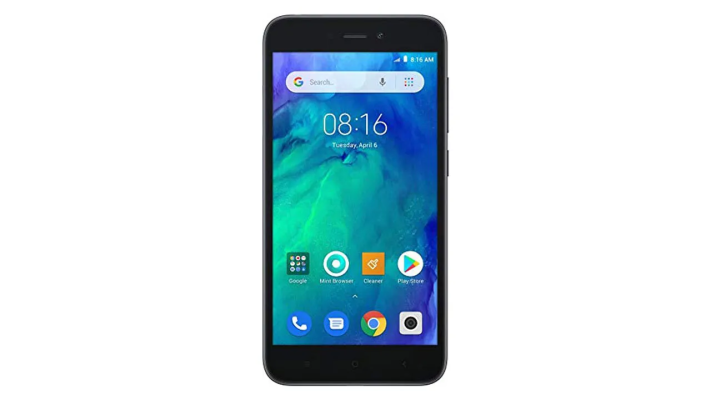

In [18]:
image = cv2.imread('phone.jpg')
image = imutils.resize(image, height=400)
cv2_imshow(image)

**Konwersja do odcieni szarości**

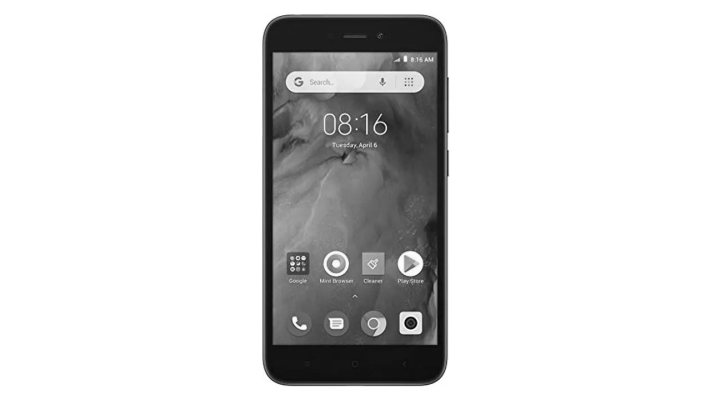

In [19]:
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

**Detekcja krawędzi**

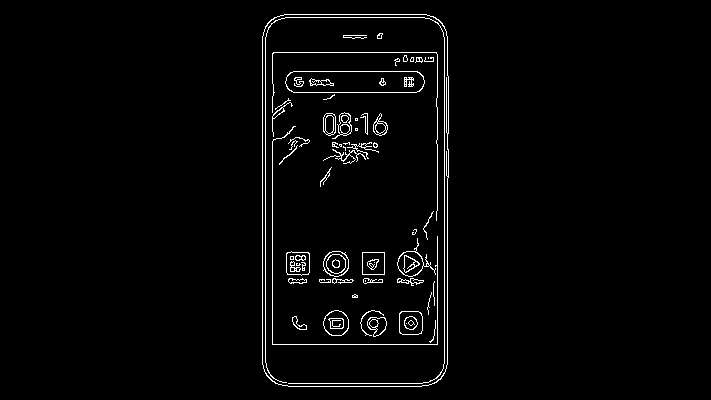

In [20]:
edges1 = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges1)

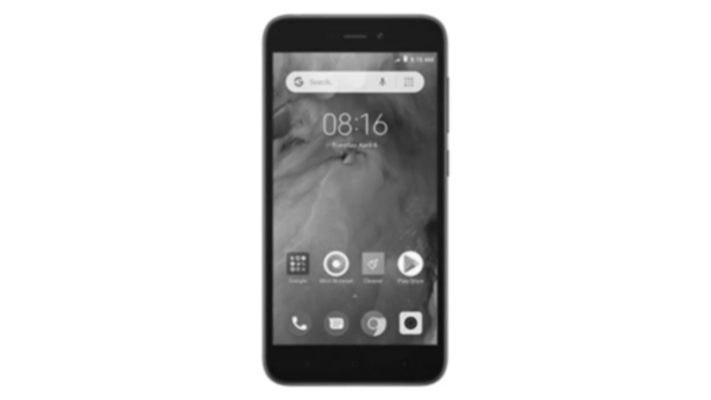

In [21]:
gray_image = cv2.GaussianBlur(src=gray_image, ksize=(5, 5), sigmaX=0)
cv2_imshow(gray_image)

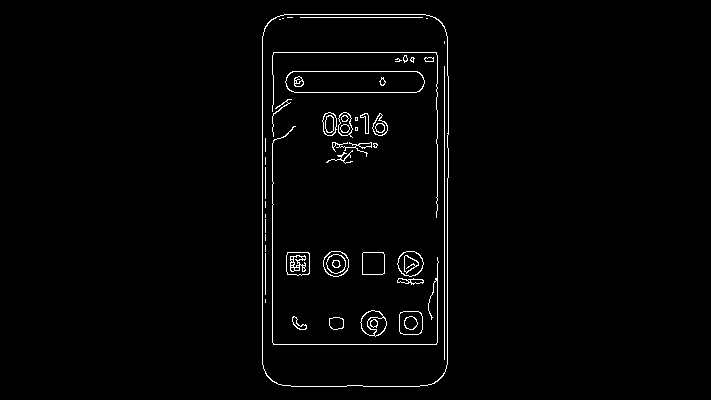

In [22]:
edges = cv2.Canny(image=gray_image, threshold1=70, threshold2=200)
cv2_imshow(edges)

**Detekcja konturu**

In [23]:
contours = cv2.findContours(image=edges.copy(),
                            mode=cv2.RETR_TREE, 
                            method=cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

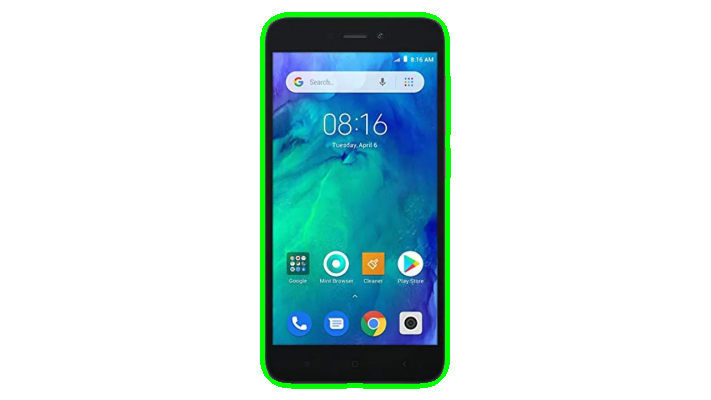

In [24]:
cnt1 = cv2.drawContours(image=image.copy(), contours=[contours[0]], contourIdx=-1, 
                        color=(0, 255, 0), thickness=3)
cv2_imshow(cnt1)

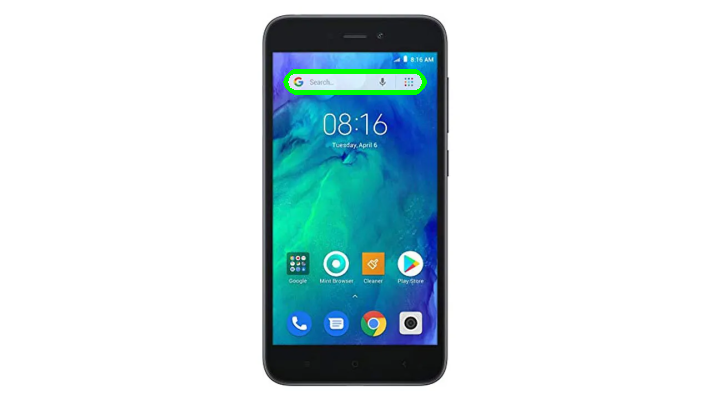

In [25]:
cnt2 = cv2.drawContours(image=image.copy(), contours=[contours[3]], contourIdx=-1, 
                        color=(0, 255, 0), thickness=3)
cv2_imshow(cnt2)

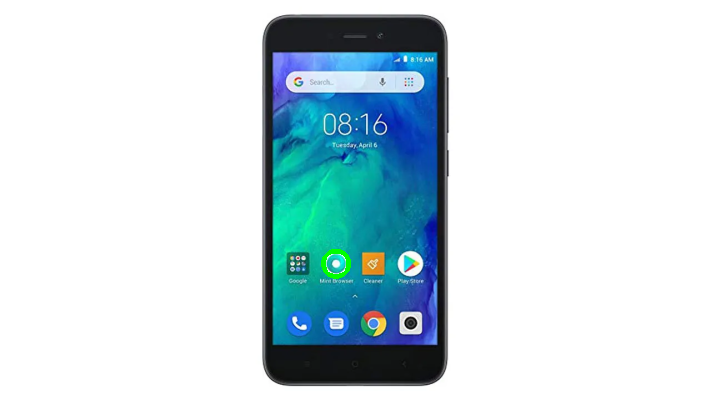

In [26]:
cnt3 = cv2.drawContours(image=image.copy(), contours=[contours[4]], contourIdx=-1, 
                        color=(0, 255, 0), thickness=3)
cv2_imshow(cnt3)

**Detekcja prostokąta**

In [27]:
screen_contour = None

for contour in contours:
    perimeter = cv2.arcLength(curve=contour, closed=True)
    approx = cv2.approxPolyDP(curve=contour, epsilon=0.015 * perimeter, closed=True)

    if len(approx) == 4:
        screen_contour = approx
        break

In [28]:
screen_contour

array([[[277,  16]],

       [[265, 373]],

       [[434, 383]],

       [[444,  26]]], dtype=int32)

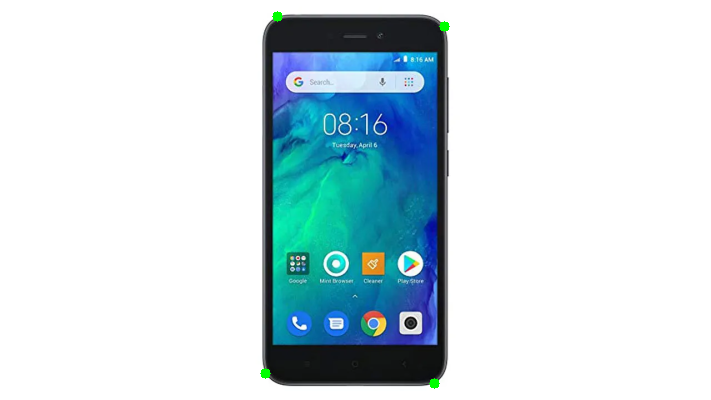

In [29]:
vertices = cv2.drawContours(image=image.copy(), contours=screen_contour, contourIdx=-1, color=(0, 255, 0), thickness=10)
cv2_imshow(vertices)

** Wyświetlenie znalezionego kształtu**

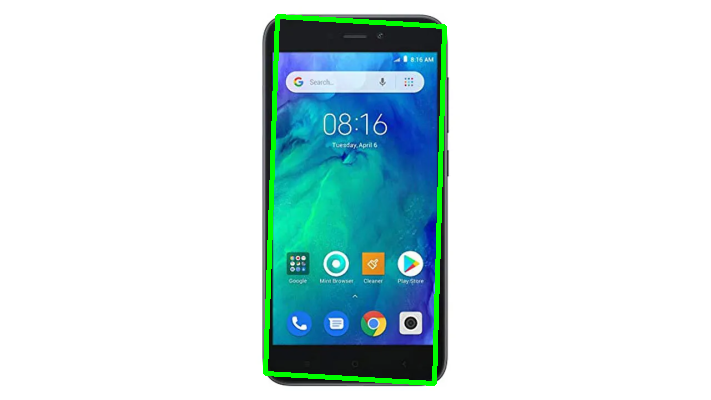

In [30]:
screen_contour = cv2.drawContours(image=image.copy(), contours=[screen_contour], contourIdx=-1, color=(0, 255, 0), thickness=3)
cv2_imshow(screen_contour)